In [2]:
import pandas as pd

# Utiliser un chemin d'accès correct sous Windows
# df = pd.read_csv(r'C:\Users\shami\Downloads\temperature-quotidienne-departementale.csv', sep=';')

# Si fichier importé dans Colab
df = pd.read_csv('/content/temperature-quotidienne-departementale.csv', sep=';')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251136 entries, 0 to 251135
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    251136 non-null  object 
 1   Code INSEE département  251136 non-null  object 
 2   Département             251136 non-null  object 
 3   TMin (°C)               251133 non-null  float64
 4   TMax (°C)               251133 non-null  float64
 5   TMoy (°C)               251133 non-null  float64
dtypes: float64(3), object(3)
memory usage: 11.5+ MB


In [4]:
df.isnull().sum()

,0
Date,0
Code INSEE département,0
Département,0
TMin (°C),3
TMax (°C),3
TMoy (°C),3


In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

# Analyse Exploratoire

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

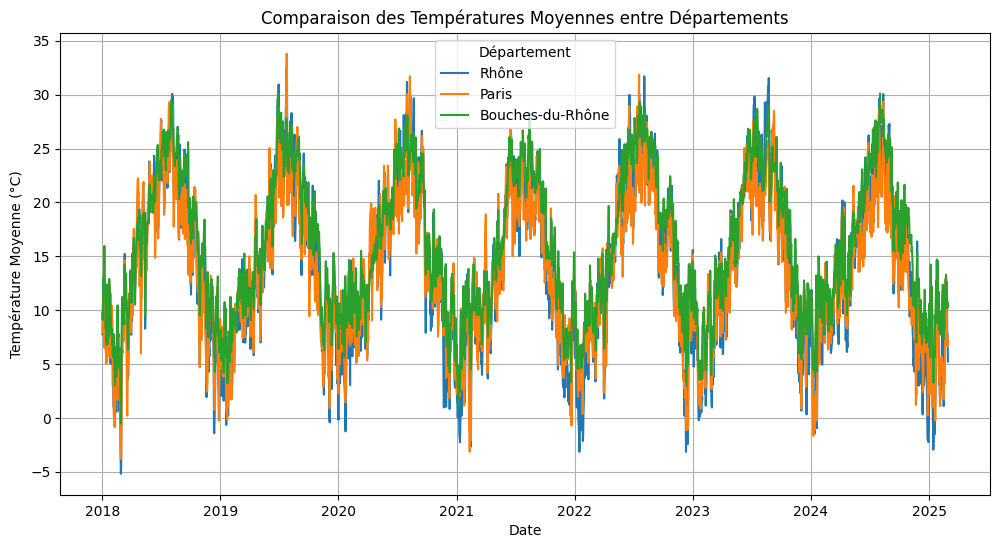

In [8]:
departements_selectionnes = ['75', '69', '13']
df_selection = df[df['Code INSEE département'].isin(departements_selectionnes)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selection, x='Date', y='TMoy (°C)', hue='Département')
plt.xlabel('Date')
plt.ylabel('Température Moyenne (°C)')
plt.title('Comparaison des Températures Moyennes entre Départements')
plt.grid(True)
plt.legend(title='Département')
plt.show()

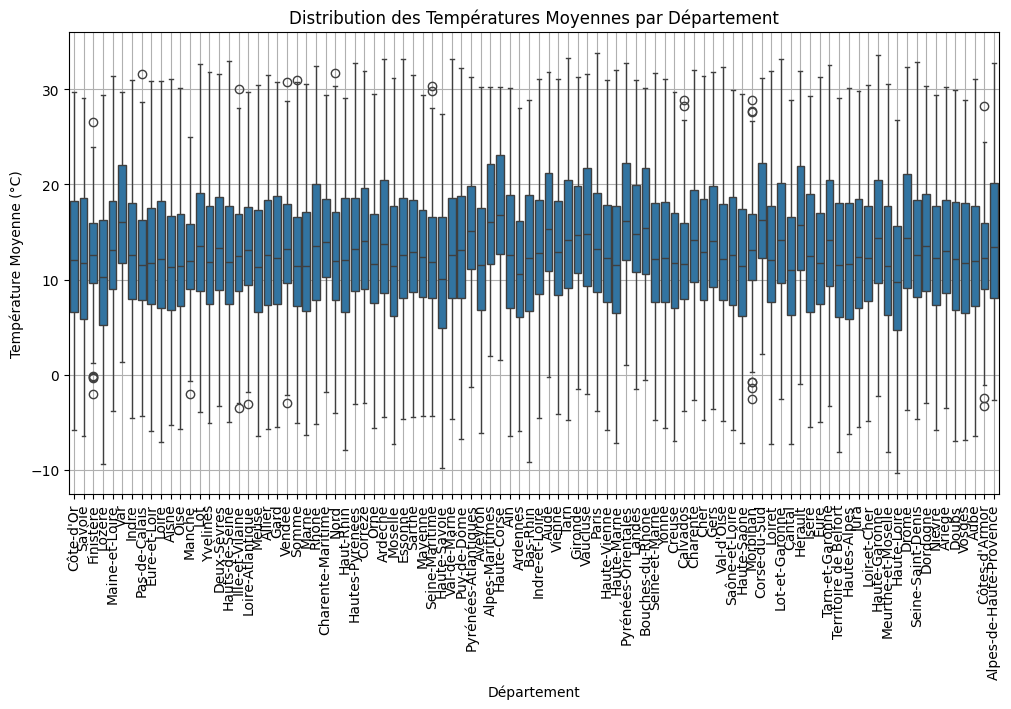

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Département', y='TMoy (°C)', data=df)
plt.xticks(rotation=90)
plt.xlabel('Département')
plt.ylabel('Température Moyenne (°C)')
plt.title('Distribution des Températures Moyennes par Département')
plt.grid(True)
plt.show()

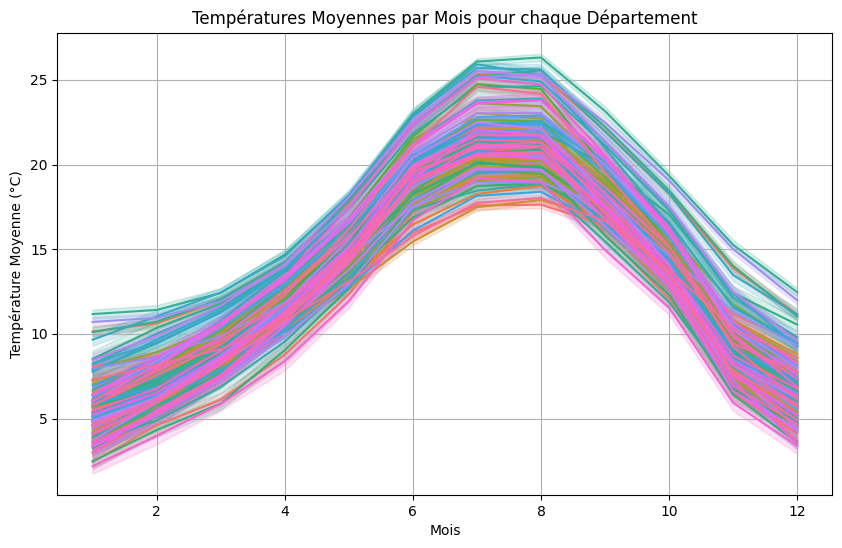

In [10]:
df['Mois'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(x='Mois', y='TMoy (°C)', data=df, hue='Département', legend=False)
plt.xlabel('Mois')
plt.ylabel('Température Moyenne (°C)')
plt.title('Températures Moyennes par Mois pour chaque Département')
plt.grid(True)
plt.show()

Visualiser la température moyenne mensuelle d’un département

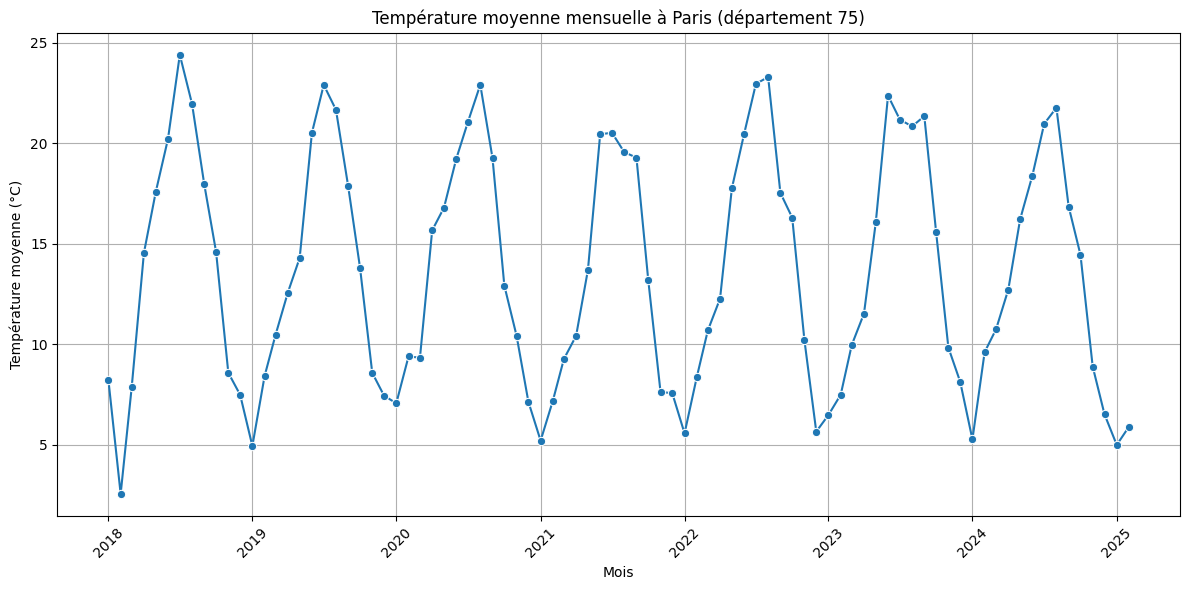

In [14]:
# Exemple : visualiser Paris (département 75)
df_paris = df_mensuel[df_mensuel['Code INSEE département'] == '75']

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_paris, x='Mois', y='TMoy (°C)', marker='o')
plt.title("Température moyenne mensuelle à Paris (département 75)")
plt.xlabel("Mois")
plt.ylabel("Température moyenne (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations (cas d'étude localisé) :

- La saisonnalité annuelle est nette

- Idée claire de l'évolution année après année -> lien fort entre météo et consommation

"Voici un exemple de variation mensuelle des températures à Paris, illustrant la régularité saisonnière qui influence les pics de consommation."



Moyenne des températures par mois

In [17]:
# Conversion de la colonne Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Création de la colonne Mois pour regrouper par mois
df['Mois'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Nettoyage : on supprime les lignes où les températures sont nulles
df = df.dropna(subset=['TMoy (°C)', 'TMin (°C)', 'TMax (°C)'])

# Calcul des moyennes mensuelles par département
df_mensuel = df.groupby(['Code INSEE département', 'Mois'])[['TMin (°C)', 'TMax (°C)', 'TMoy (°C)']].mean().reset_index()

# Affichage d’un aperçu
df_mensuel.head()

,Code INSEE département,Mois,TMin (°C),TMax (°C),TMoy (°C)
0,01,2018-01-01,4.612903,10.506452,7.559677
1,01,2018-02-01,-1.450000,5.396429,1.973214
2,01,2018-03-01,2.625806,12.464516,7.545161
3,01,2018-04-01,7.866667,20.740000,14.303333
4,01,2018-05-01,11.222581,22.293548,16.758065


from matplotlib import pyplot as plt
_df_0['TMin (°C)'].plot(kind='hist', bins=20, title='TMin (°C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TMax (°C)'].plot(kind='hist', bins=20, title='TMax (°C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TMoy (°C)'].plot(kind='hist', bins=20, title='TMoy (°C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='TMin (°C)', y='TMax (°C)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TMax (°C)', y='TMoy (°C)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mois']
  ys = series['TMin (°C)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Mois', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mois')
_ = plt.ylabel('TMin (°C)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mois']
  ys = series['TMax (°C)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Mois', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mois')
_ = plt.ylabel('TMax (°C)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mois']
  ys = series['TMoy (°C)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Mois', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mois')
_ = plt.ylabel('TMoy (°C)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Mois']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Mois'}, axis=1)
              .sort_values('Mois', ascending=True))
  xs = counted['Mois']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Mois', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mois')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['TMin (°C)'].plot(kind='line', figsize=(8, 4), title='TMin (°C)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['TMax (°C)'].plot(kind='line', figsize=(8, 4), title='TMax (°C)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['TMoy (°C)'].plot(kind='line', figsize=(8, 4), title='TMoy (°C)')
plt.gca().spines[['top', 'right']].set_visible(False)

- Sert de base pour la fusion avec la consommation ou la régression

"Nous avons ensuite regroupé les températures par mois et par département pour obtenir un dataset exploitable en modélisation."

In [19]:
# Lister tous les départements présents dans df_mensuel
departements_presents = df_mensuel['Code INSEE département'].unique()
print(sorted(departements_presents))

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95']


Tous les départements vont du 01 ou 95.

In [18]:
df_mensuel.to_csv('df_mensuel.csv', index=False)

Cette ligne sert pour le notebook de consommation, pour préparer la régression linéaire multiple !